In [1]:
# import libraries
import os
import glob
import math
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import plotly.express as px
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point
import folium
plt.style.use('ggplot')

# Load Raw Data

In [3]:
raw_df = pd.read_csv('raw_data/crashes_raw.csv')

In [4]:
raw_df.head(3)

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,8168138,2019,2020-01-28,3000,2019-08-30,1600,3358,972D1,5,5,...,0,0,-,-,NaN,NaN,ORANGE,SAN JUAN CAPISTRANO,-117.656082,33.503235
1,8806652,2019,2019-07-18,3000,2019-02-17,700,9220,972D1,7,5,...,0,0,-,SF,NaN,NaN,ORANGE,SAN JUAN CAPISTRANO,-117.658058,33.502583
2,8833557,2019,2019-07-18,3000,2019-03-23,2151,2647,952G6,6,5,...,0,0,-,-,NaN,NaN,ORANGE,SAN JUAN CAPISTRANO,-117.633255,33.514874


In [6]:
raw_df.columns

Index(['CASE_ID', 'ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK',
       'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE',
       'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER',
       'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION',
       'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY',
       'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX',
       'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY',
       'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED',
       'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL',
       'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION',
       'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_

## Trimmed TIMS raw data

In [7]:
TIMS_trimmed_df = raw_df[
    [
        "CASE_ID",
        "ACCIDENT_YEAR",
        "POSTMILE",
        "COLLISION_SEVERITY",
        "NUMBER_KILLED",
        "NUMBER_INJURED",
        "PARTY_COUNT",
        "PRIMARY_COLL_FACTOR",
        "PCF_VIOL_CATEGORY",
        "TYPE_OF_COLLISION",
        "PED_ACTION",
        "PEDESTRIAN_ACCIDENT",
        "BICYCLE_ACCIDENT",
        "MOTORCYCLE_ACCIDENT",
        "TRUCK_ACCIDENT",
        "NOT_PRIVATE_PROPERTY",
        "ALCOHOL_INVOLVED",
        "POINT_X",
        "POINT_Y",
    ]
].copy()


## Add geometry data

In [50]:
TIMS_trimmed_df['geometry'] = TIMS_trimmed_df.apply(lambda row: Point(row.POINT_X, row.POINT_Y), axis=1)
TIMS_trimmed_df = gpd.GeoDataFrame(TIMS_trimmed_df, geometry='geometry')
TIMS_trimmed_df.crs = 'EPSG:4019'

In [66]:
TIMS_trimmed_gdf = TIMS_trimmed_df.copy()
TIMS_trimmed_gdf.to_parquet('data/TIMS_trimmed_gdf.parquet')

# Load SR postmile data

In [47]:
SR74_postmile_gdf = gpd.read_parquet('data/SR74_postmile_gdf.parquet')

In [48]:
SR74_postmile_gdf

,OBJECTID,ROUTE,ROUTEID,COUNTY,DISTRICT,PMPREFIX,PM,PMSUFFIX,PMC,ALIGNCODE,Lat_WGS84,Long_WGS84,geometry,SECTION
576,258722,74,74_20171231_R,ORA,12,None,11.300000,None,11.3,Right,33.580740,-117.529616,POINT (-117.52962 33.58074),3
577,258737,74,74_20171231_R,ORA,12,None,3.000000,None,3,Right,33.521904,-117.613456,POINT (-117.61346 33.52190),2
581,259040,74,74_20171231_R,ORA,12,None,16.599001,None,16.599,Right,33.602202,-117.457767,POINT (-117.45777 33.60220),3
584,259362,74,74_20171231_R,ORA,12,None,8.800000,None,8.8,Right,33.551094,-117.548974,POINT (-117.54897 33.55109),3
585,259585,74,74_20171231_R,ORA,12,None,11.600000,None,11.6,Right,33.582667,-117.525100,POINT (-117.52510 33.58267),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,263226,74,74_20171231_R,ORA,12,None,1.000000,None,1,Right,33.510625,-117.644545,POINT (-117.64455 33.51062),1
5696,263266,74,74_20171231_R,ORA,12,None,6.000000,None,6,Right,33.515031,-117.565596,POINT (-117.56560 33.51503),2
5700,263753,74,74_20171231_R,ORA,12,None,9.500000,None,9.5,Right,33.560830,-117.547352,POINT (-117.54735 33.56083),3
5703,264190,74,74_20171231_R,ORA,12,None,15.100000,None,15.1,Right,33.592178,-117.475349,POINT (-117.47535 33.59218),3


In [43]:
def cmcp_section(pm):
    if pm <=2.6:
        return 1
    elif 2.6 < pm <= 7.2:
        return 2
    else:
        return 3

In [45]:
SR74_postmile_gdf['SECTION'] = np.vectorize(cmcp_section)(SR74_postmile_gdf['PM'])

In [46]:
SR74_postmile_gdf.to_parquet('data/SR74_postmile_gdf.parquet')

# Spaital join two gdfs

In [67]:
SR74_TIMS_joined = gpd.sjoin_nearest(SR74_postmile_gdf, TIMS_trimmed_gdf, how='inner', distance_col='distance')

/Users/yu-jenchen/miniforge3/envs/py4ds/lib/python3.11/site-packages/geopandas/array.py:344: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [61]:
SR74_TIMS_joined.crs

<Geographic 2D CRS: EPSG:4019>
Name: Unknown datum based upon the GRS 1980 ellipsoid
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Not specified.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: Not specified (based on GRS 1980 ellipsoid)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [62]:
SR74_postmile_gdf.crs

<Geographic 2D CRS: EPSG:4019>
Name: Unknown datum based upon the GRS 1980 ellipsoid
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Not specified.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: Not specified (based on GRS 1980 ellipsoid)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

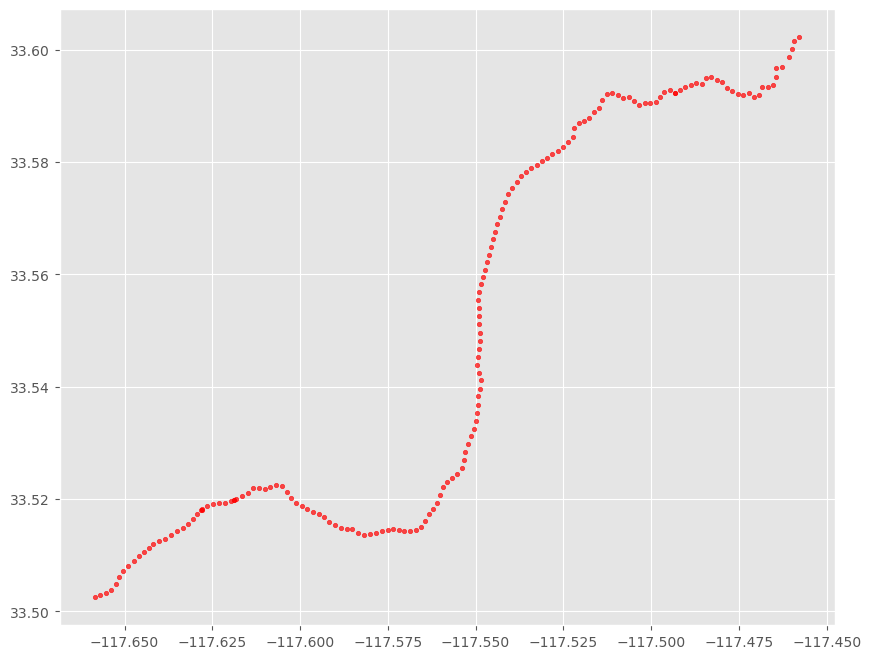

In [59]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(SR74_TIMS_joined['Long_WGS84'], SR74_TIMS_joined['Lat_WGS84'], marker='o', color='red', alpha=0.7, s=10)

In [68]:
SR74_TIMS_joined.columns

Index(['OBJECTID', 'ROUTE', 'ROUTEID', 'COUNTY', 'DISTRICT', 'PMPREFIX', 'PM',
       'PMSUFFIX', 'PMC', 'ALIGNCODE', 'Lat_WGS84', 'Long_WGS84', 'geometry',
       'SECTION', 'index_right', 'CASE_ID', 'ACCIDENT_YEAR', 'POSTMILE',
       'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED', 'PARTY_COUNT',
       'PRIMARY_COLL_FACTOR', 'PCF_VIOL_CATEGORY', 'TYPE_OF_COLLISION',
       'PED_ACTION', 'PEDESTRIAN_ACCIDENT', 'BICYCLE_ACCIDENT',
       'MOTORCYCLE_ACCIDENT', 'TRUCK_ACCIDENT', 'NOT_PRIVATE_PROPERTY',
       'ALCOHOL_INVOLVED', 'POINT_X', 'POINT_Y', 'distance'],
      dtype='object')

In [69]:
SR74_TIMS_joined = SR74_TIMS_joined[
    [
        "OBJECTID",
        "PM",
        "SECTION",
        "Lat_WGS84",
        "Long_WGS84",
        "CASE_ID",
        "ACCIDENT_YEAR",
        "POSTMILE",
        "COLLISION_SEVERITY",
        "NUMBER_KILLED",
        "NUMBER_INJURED",
        "PARTY_COUNT",
        "PRIMARY_COLL_FACTOR",
        "PCF_VIOL_CATEGORY",
        "TYPE_OF_COLLISION",
        "PED_ACTION",
        "PEDESTRIAN_ACCIDENT",
        "BICYCLE_ACCIDENT",
        "MOTORCYCLE_ACCIDENT",
        "TRUCK_ACCIDENT",
        "NOT_PRIVATE_PROPERTY",
        "ALCOHOL_INVOLVED",
        "POINT_X",
        "POINT_Y",
        "geometry",
    ]
].copy()


In [71]:
SR74_TIMS_joined.groupby(['SECTION', 'ACCIDENT_YEAR'])[["CASE_ID"]].agg(['count'])

CASE_ID
                        count
SECTION ACCIDENT_YEAR        
1       2019               15
        2020                5
        2021                9
2       2019               22
        2020               11
        2021               15
3       2019               24
        2020               44
        2021               26